# Wine Classification

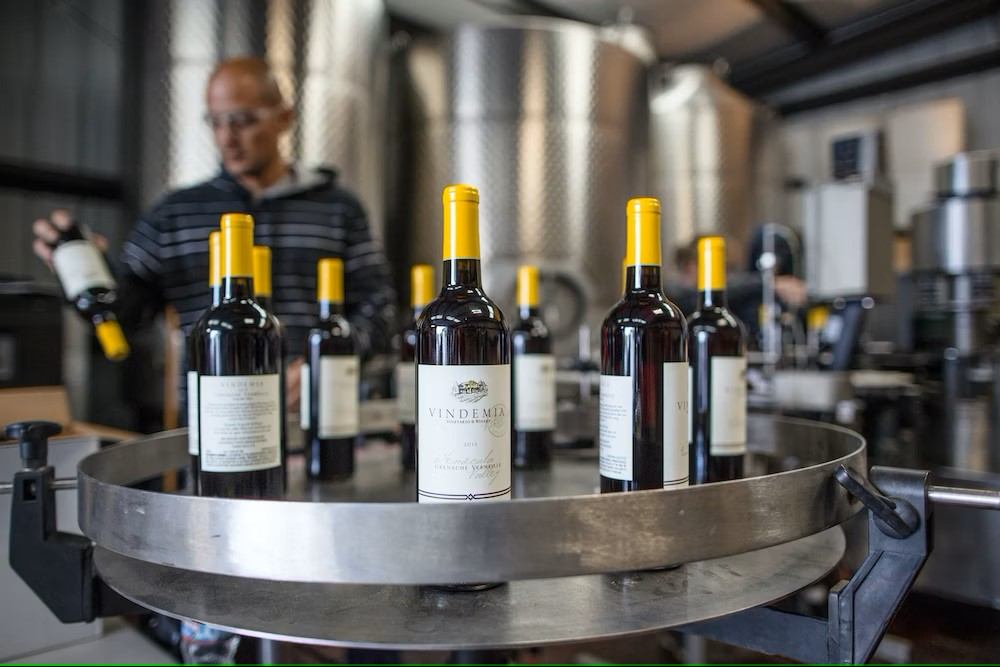

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Define column names and read the csv file
column_names = ['Class','Alcohol','Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue','OD280/OD315 of diluted wines',
                'Proline']
df = pd.read_csv('wine.data',names=column_names,delimiter=',')

In [17]:
# Print the first 5 observation of data
df.head()

Class  Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [18]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [19]:
# We have 14 features and 178 observation. Class is our dependent variable and rest are the independent variables

In [32]:
# Checking the missing values
df.isnull().sum() # There are no missing values in the dataset

Class                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

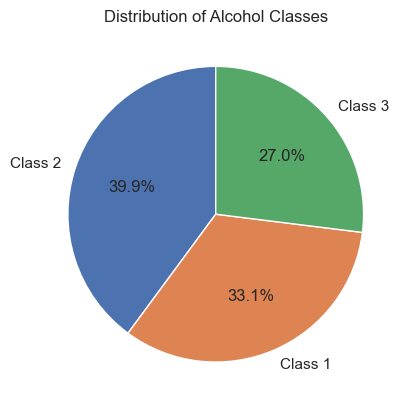

In [31]:
# Distribution of dependent variable
class_counts = df['Class'].value_counts()
plt.pie(x=class_counts,labels=['Class 2','Class 1','Class 3'],autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Alcohol Classes')
plt.show()

In [33]:
# In the above image, the Class 2 indicates high propotion rate (39.9%), followed by Class 1 (33.1%) and Class 3(27%)
# There is not a class imbalance dataset

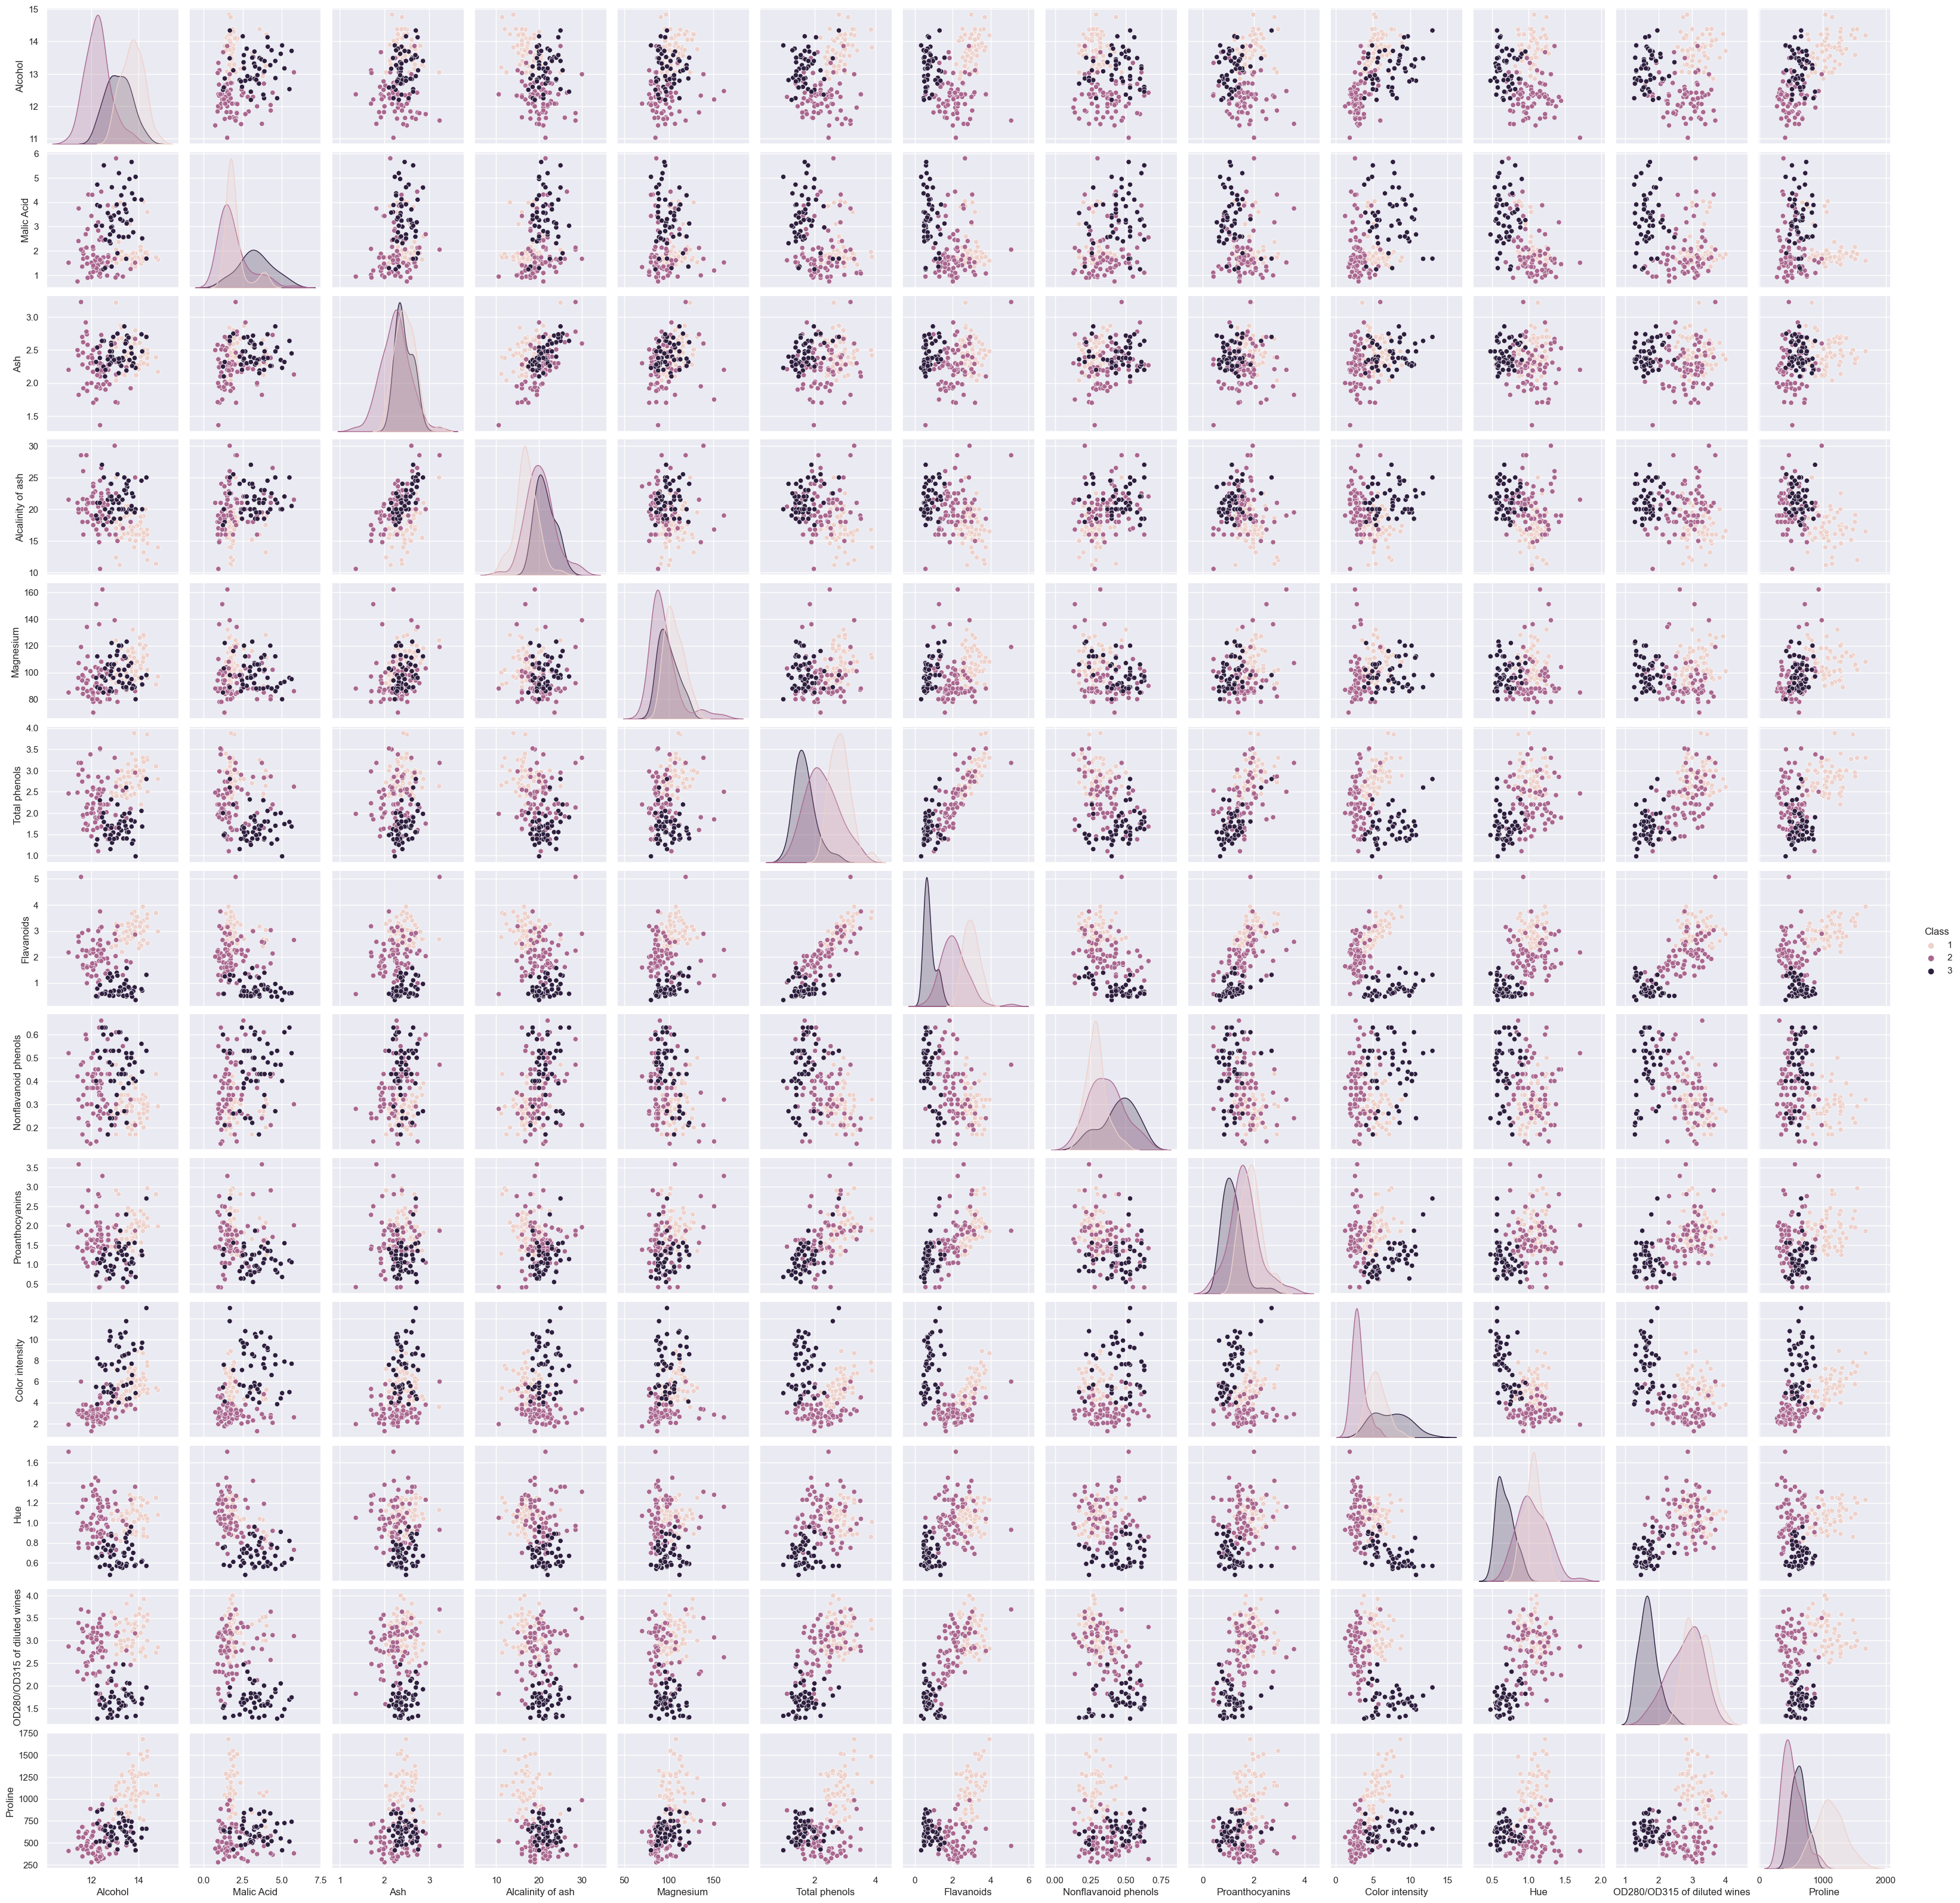

In [39]:
sns.pairplot(df,hue='Class')
plt.show()

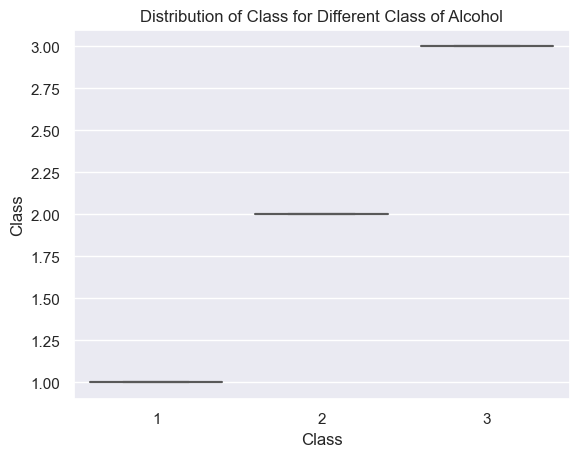

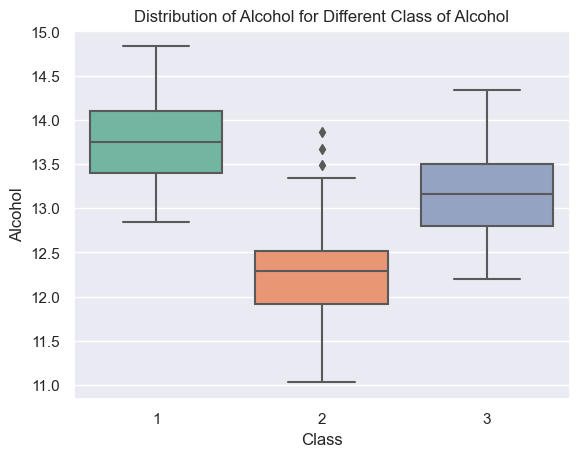

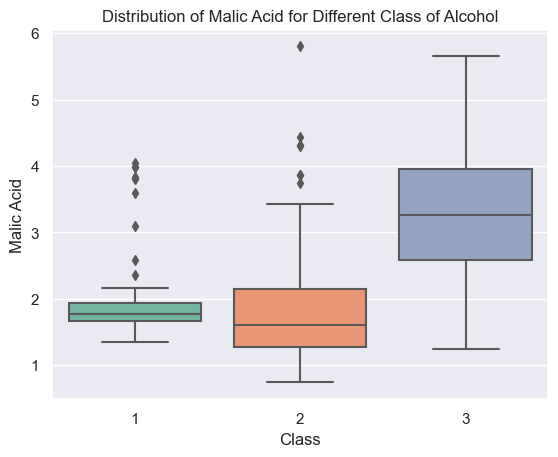

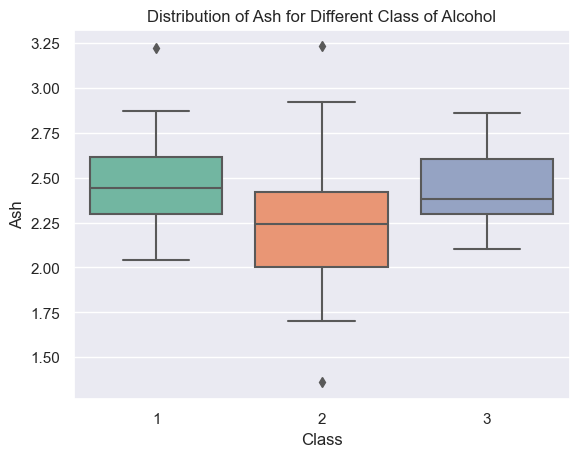

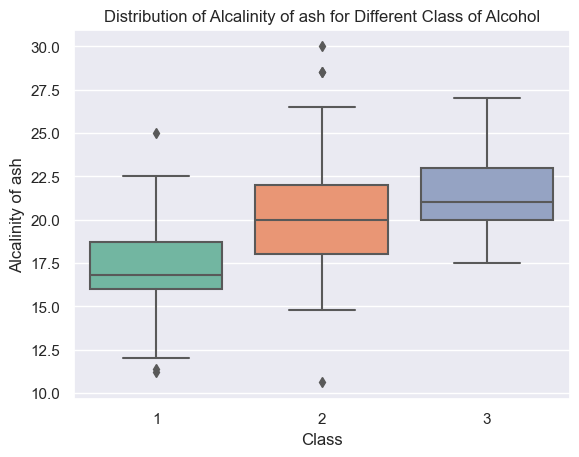

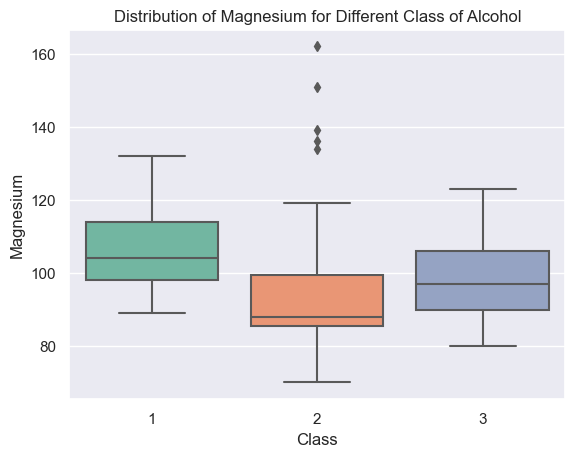

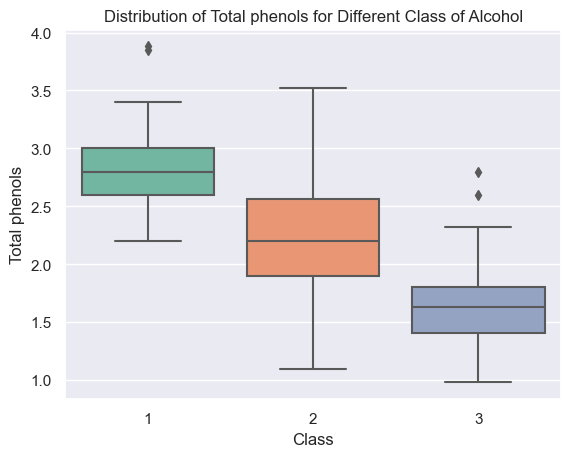

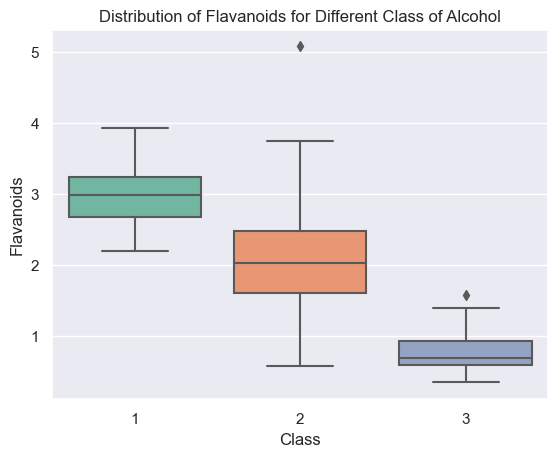

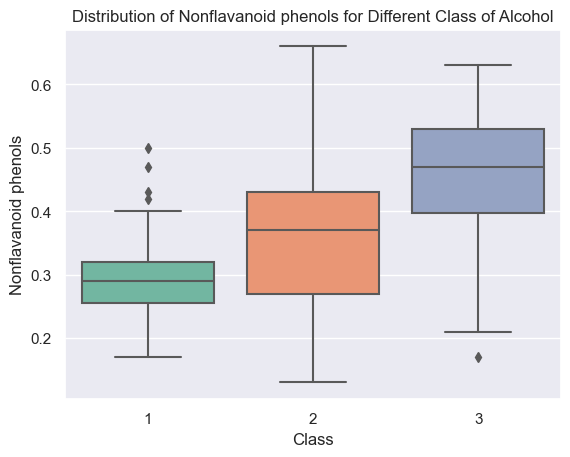

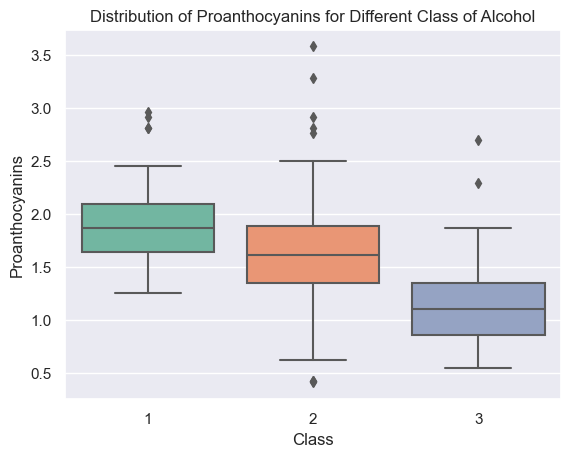

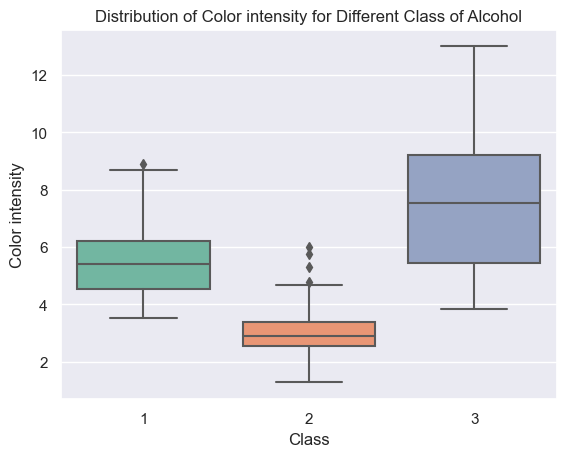

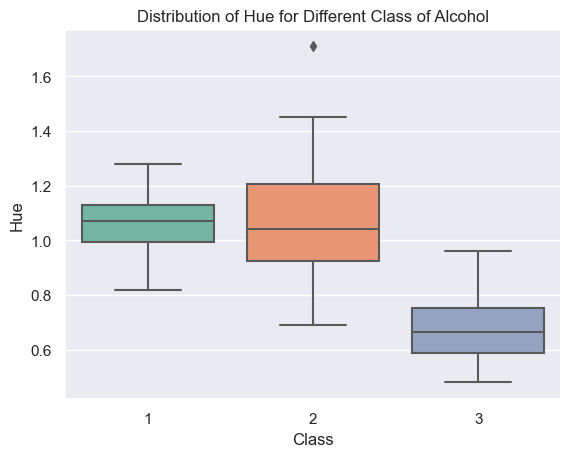

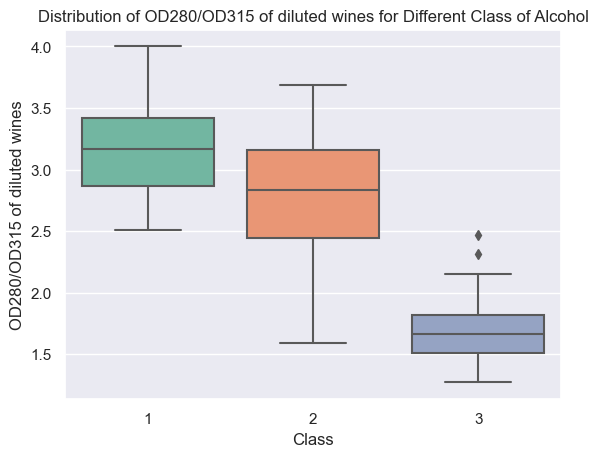

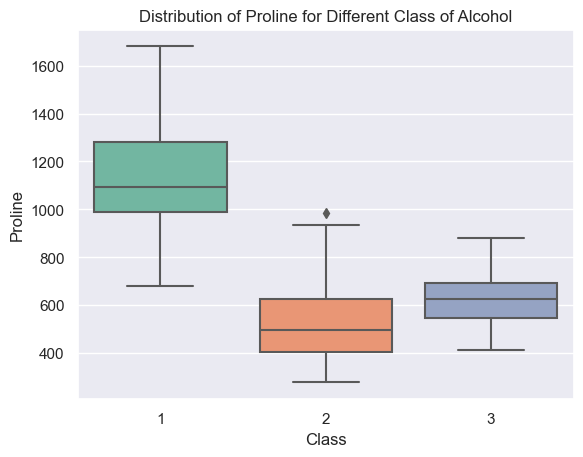

In [42]:
for col in df.columns:
    sns.boxplot(data=df,y=col,x='Class',palette='Set2')
    plt.title(f'Distribution of {col} for Different Class of Alcohol')
    plt.show()

Alcohol:

    Class 1 has the highest average alcohol content (13.7), followed by Class 3 (13.2), and then Class 2 (12.4).

Malic Acid:

    Class 3 tends to have higher Malic Acid content (average above 3), followed by Class 2 and Class 1 (average less than 2).

Ash:

    All classes have relatively similar proportions of Ash, with averages ranging between 2.25 and 2.5.

Alcalinity of Ash:

    Class 3 and Class 2 exhibit higher Alcalinity of Ash (averaging between 20 and 22.5), while Class 1 tends to have lower levels (average less than 17.5).

Magnesium:

    Class 1 typically shows higher Magnesium content (average above 100) compared to Class 2 and Class 3 (below 100).

Total Phenols:

    Class 1 has the highest levels of Total Phenols (average 2.7), followed by Class 2 (average 2.2), and then Class 3 (average 1.6).

Flavanoids:

    Class 1 displays the highest levels of Flavanoids (average 3), followed by Class 2 (average 2) and Class 3 (average below 1).

Proanthocyanins:

    Class 1 and Class 2 tend to have higher Proanthocyanins levels (averaging between 1.5 and 2.0), while Class 3 is slightly lower (average above 1).

Color Intensity:

    Class 3 has the highest Color Intensity (average 7.8), followed by Class 1 (average 5.5), and Class 2 (average 3).

Hue:

    Class 1 and Class 2 have higher Hue values (average ranging between 1 and 1.2), while Class 3 is lower (average around 0.7).

OD280/OD315 of Diluted Wines:

    Class 1 shows the highest values of OD280/OD315 (average 3.2), followed by Class 2 (average 2.9), and then Class 3 (average 1.6).

Proline:

    Class 1 exhibits the highest Proline values (average 1100), followed by Class 3 (average 600), and Class 2 (average 500).

# Correlation between target and independent variable

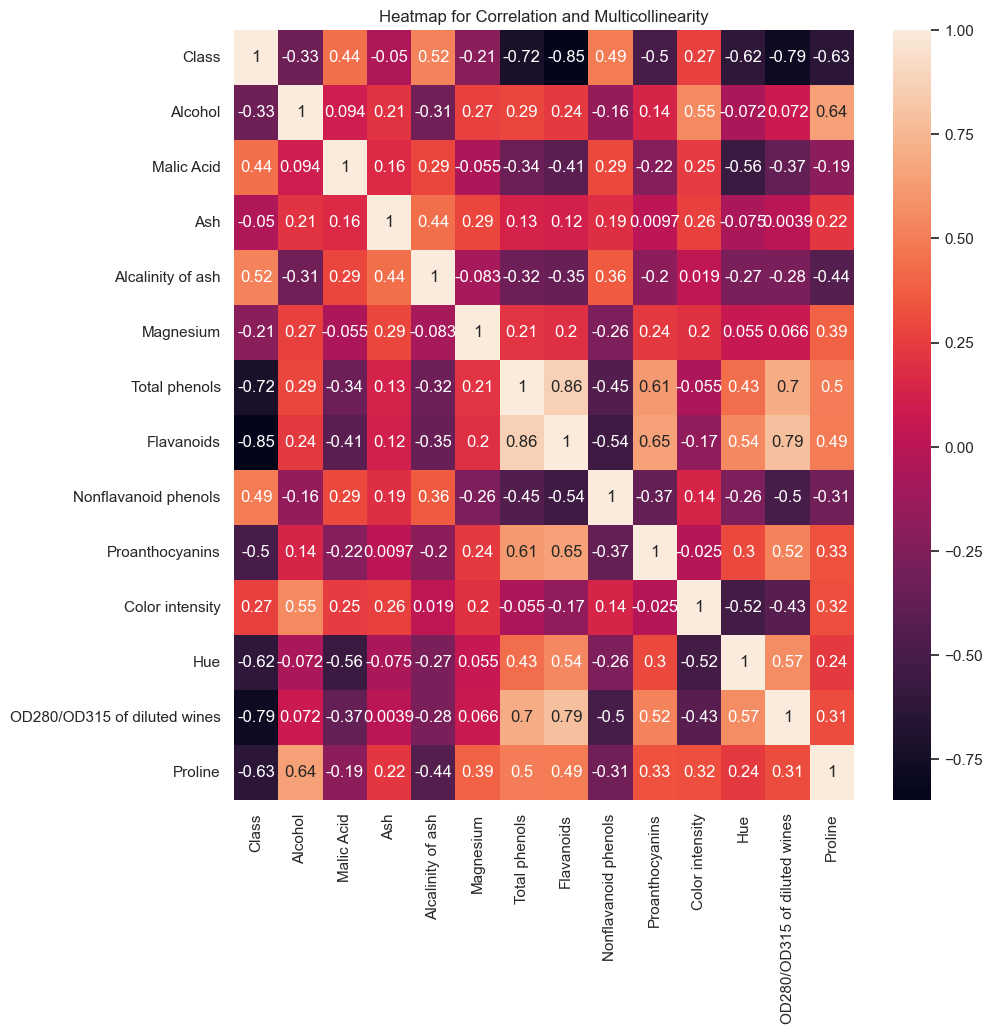

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap for Correlation and Multicollinearity')
plt.show()

The negative correlation coefficients (-0.72, -0.85, -0.79) suggest that as the levels of 'Total Phenols', 'Flavanoids', and 'PD280/OD315 of diluted wines' decrease, the 'Class' variable tends to shift towards lower values (Class 1), and as these features' levels increase, the 'Class' variable tends to shift towards higher values (Class 3).

# Multicollinearity

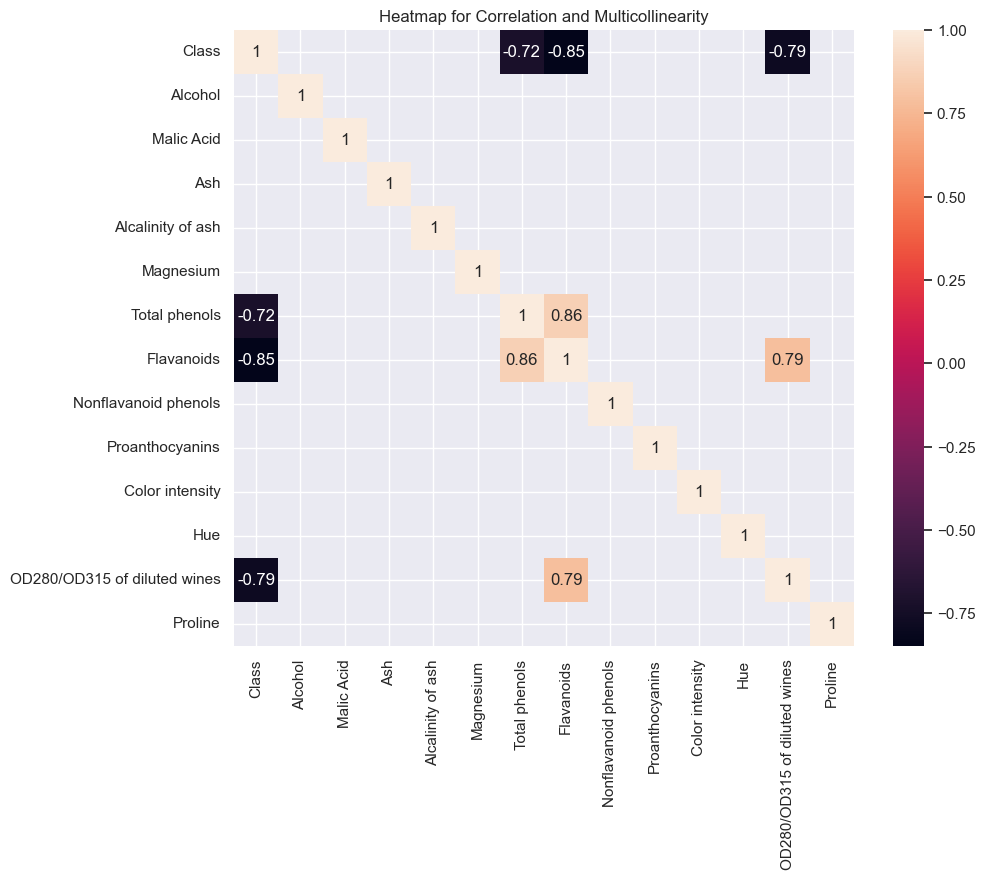

In [50]:
threshold = 0.7
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_matrix,annot=True,mask=abs(corr_matrix)<threshold)
plt.title('Heatmap for Correlation and Multicollinearity')
plt.show()

* 'OD280/OD315 of diluted wines' and 'Flavanoids':
        There is a strong positive correlation between 'OD280/OD315 of diluted wines' and 'Flavanoids'. High correlation between these two variables (multicollinearity) suggests that changes in one tend to be associated with changes in the other.

* 'Total Phenols' and 'Flavanoids':
        Similarly, 'Total Phenols' also shows a strong positive correlation with 'Flavanoids', indicating a relationship where changes in 'Total Phenols' tend to correspond to changes in 'Flavanoids'.

# Feature engineering

In [52]:
# Dropping high multi-collinear variable Flavanoid
df = df.drop('Flavanoids',axis=1)

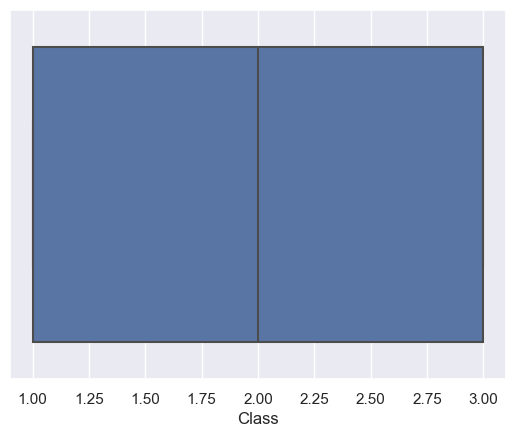

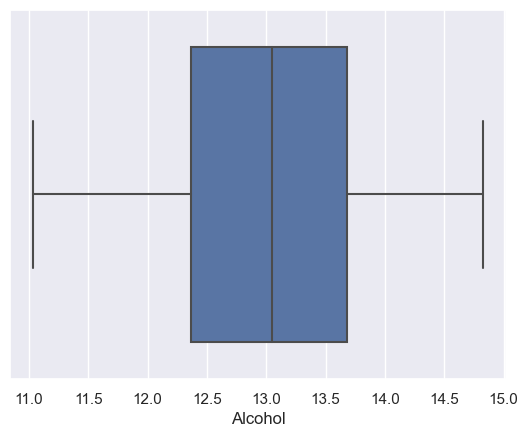

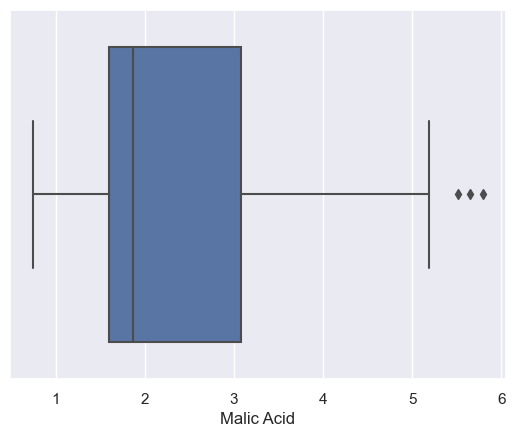

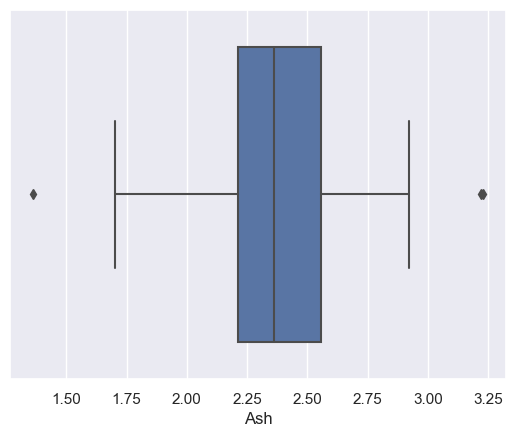

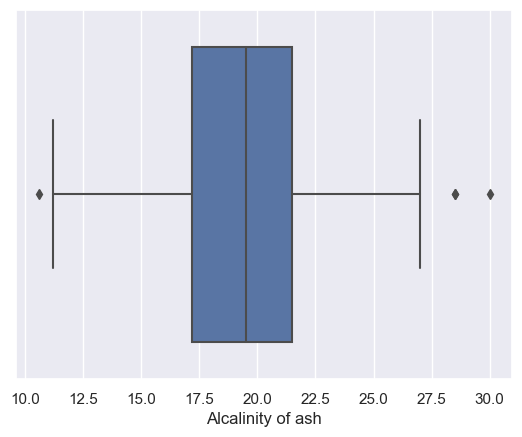

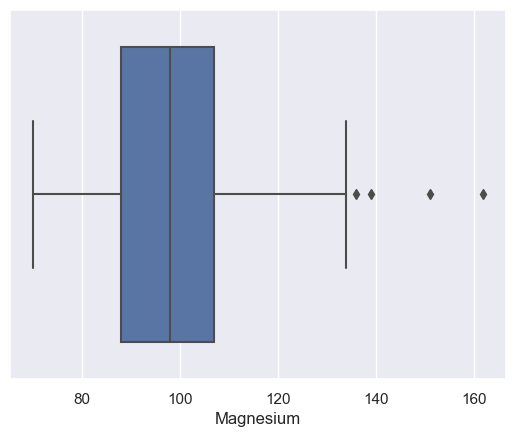

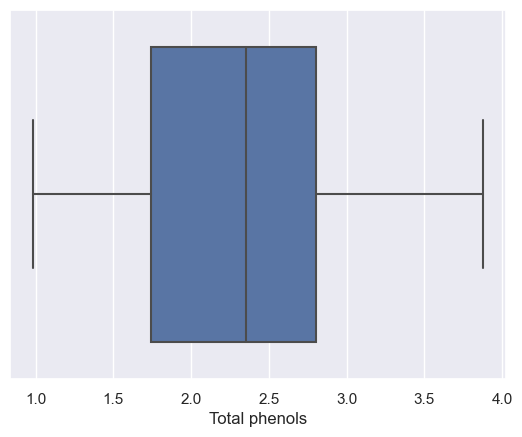

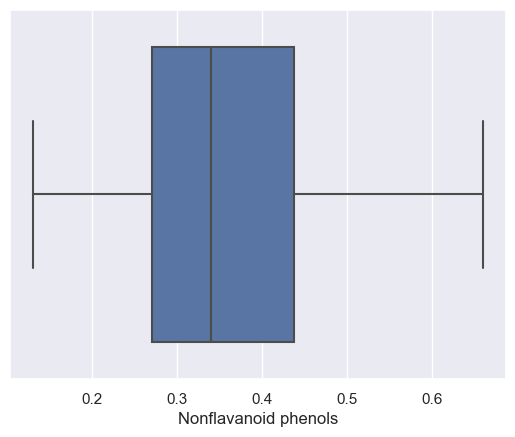

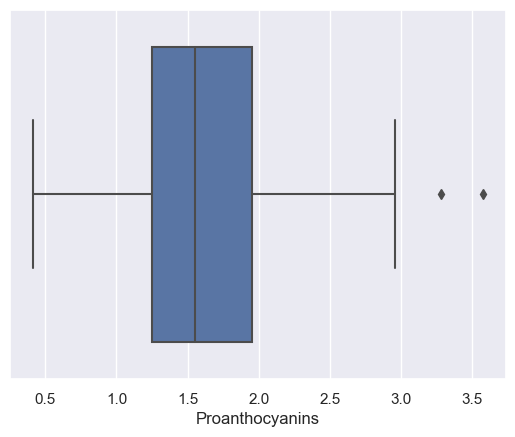

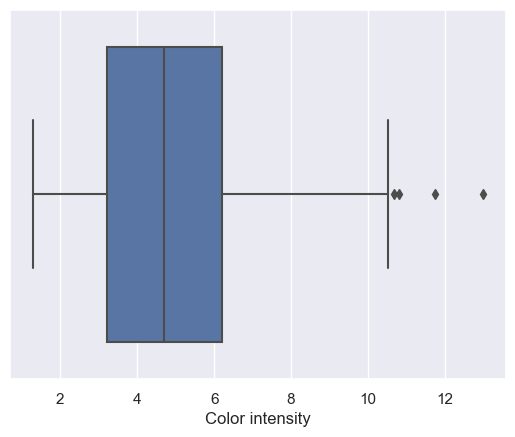

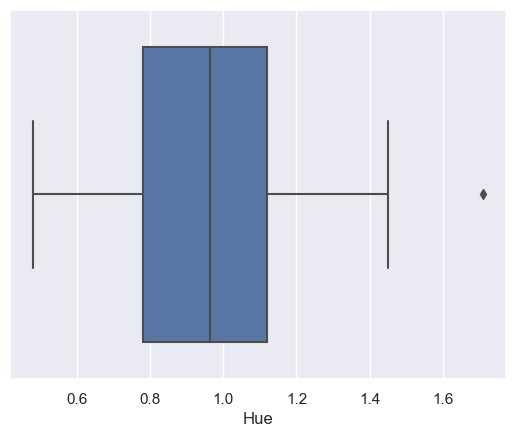

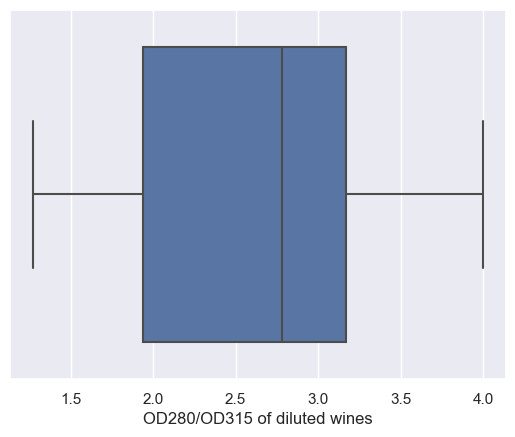

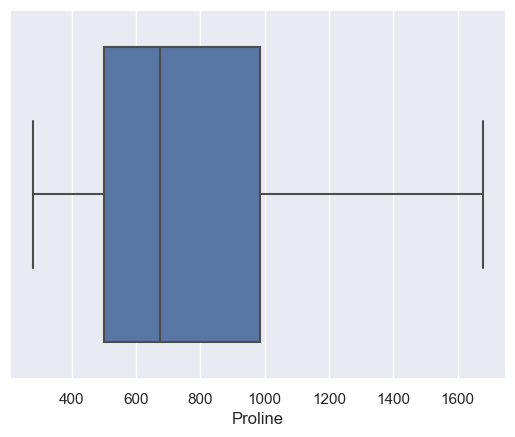

In [54]:
# Checking for outlier in data if any
for col in df.columns:
    sns.boxplot(data=df,x=col)
    plt.show()


In [59]:
# Outlier treatment with IQR approach:
def outliers(col,df):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    upper_range = Q3 + 1.5 * IQR
    lower_range = Q1 - 1.5 * IQR
    return upper_range,lower_range

independent_variables = df.drop('Class',axis=1).columns
for col in independent_variables:
    upper_range, lower_range = outliers(col,df)
    df[col] = np.where(df[col]>upper_range,upper_range,(np.where(df[col]<lower_range,lower_range,df[col])))

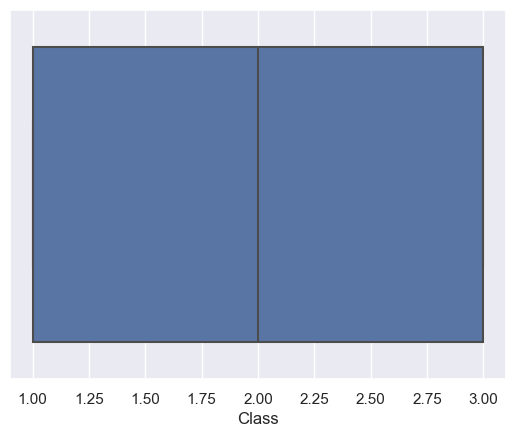

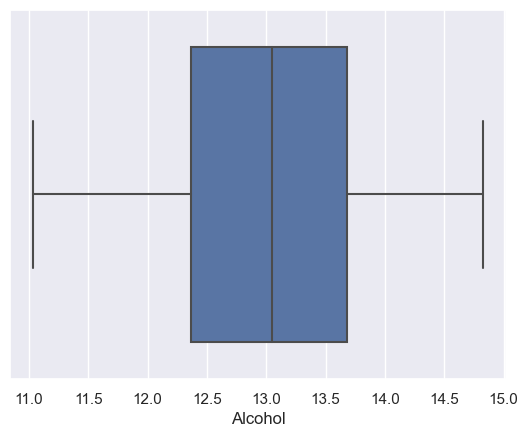

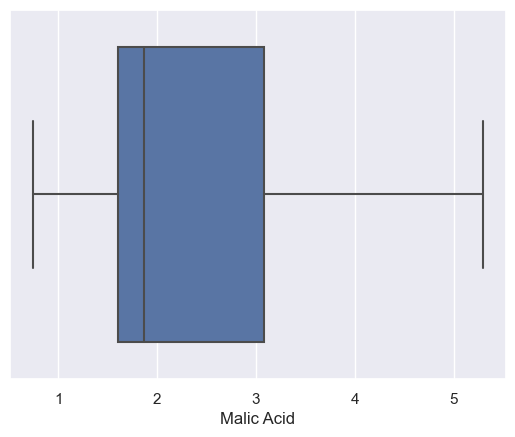

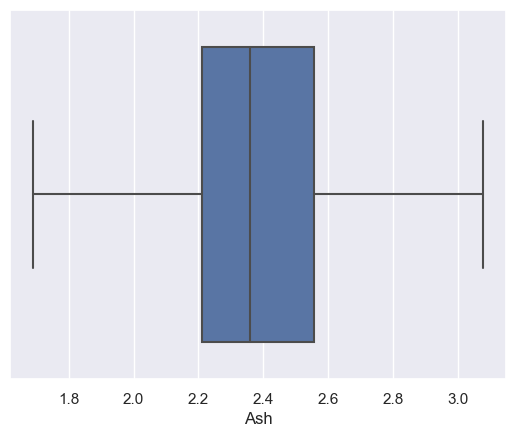

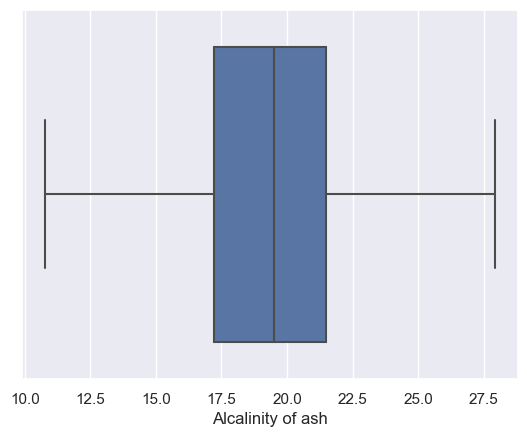

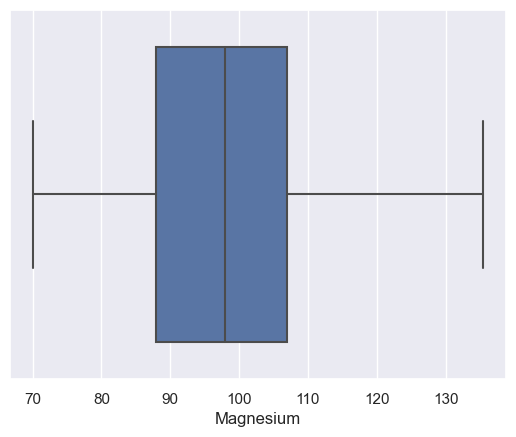

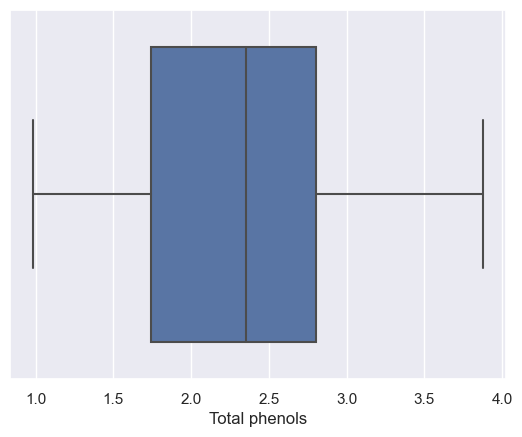

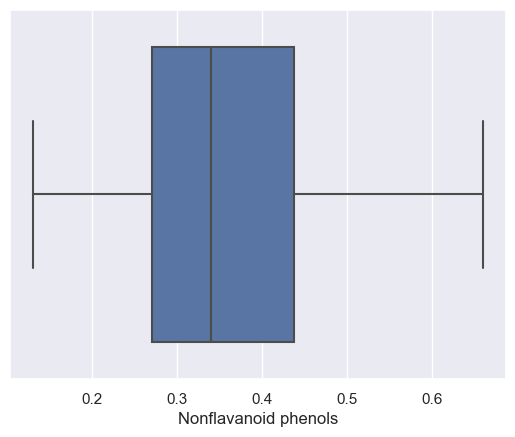

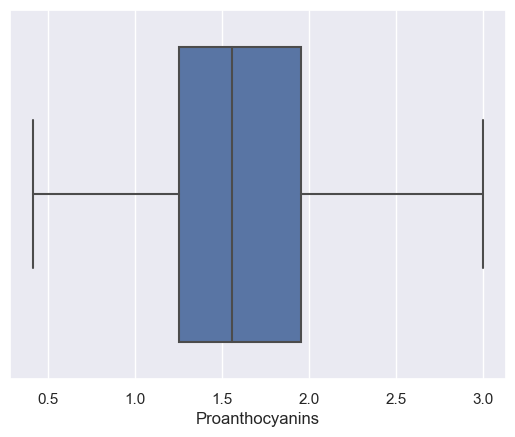

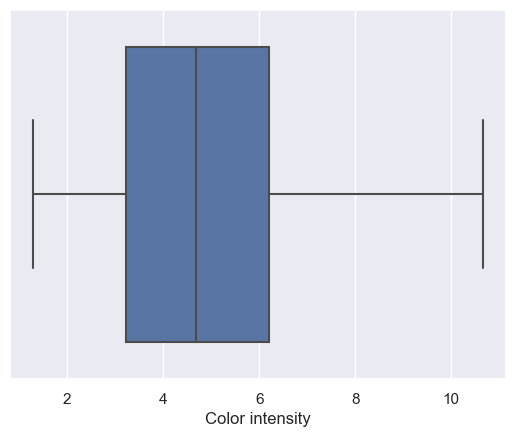

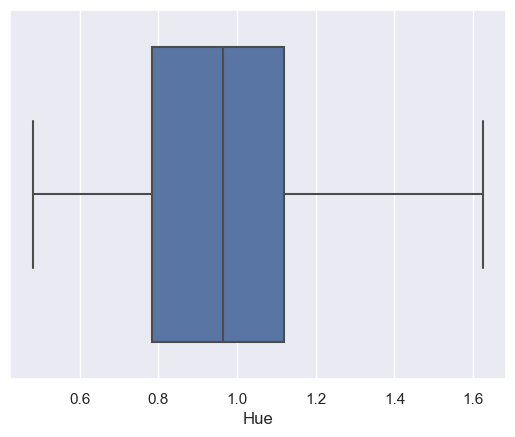

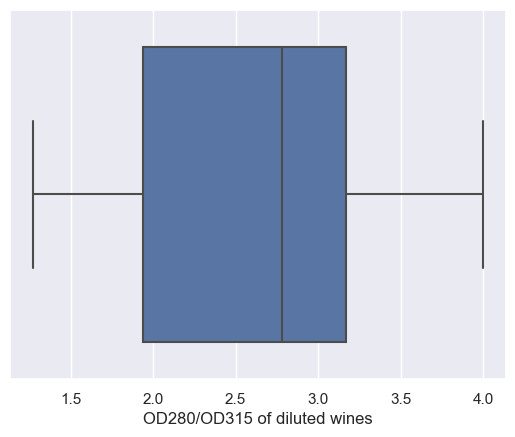

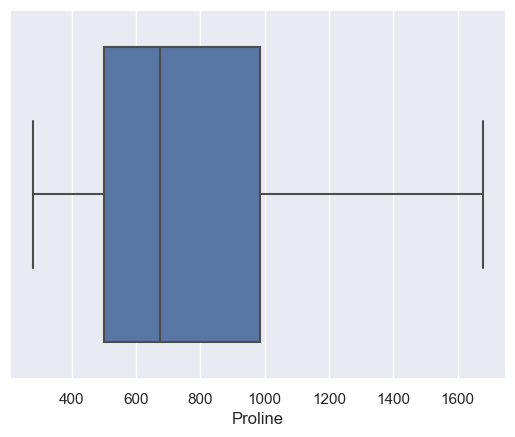

In [60]:
# Checking for outlier in data if any
for col in df.columns:
    sns.boxplot(data=df,x=col)
    plt.show()


In [61]:
# Splitting the dataset in target variable and independent variable
x = df.iloc[:,1:]
y = df['Class']

In [68]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)
print(y_train.shape,'\n',y_test.shape,'\n',y_train.value_counts())

(142,) 
 (36,) 
 2    57
1    47
3    38
Name: Class, dtype: int64


In [70]:
# Scaling the independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [72]:
# Import libraries to evaluate the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Training accuracy score:  1.0
Testing accuracy score:  0.9722222222222222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.93      0.96        14
           3       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Cross validation average score:  0.959047619047619


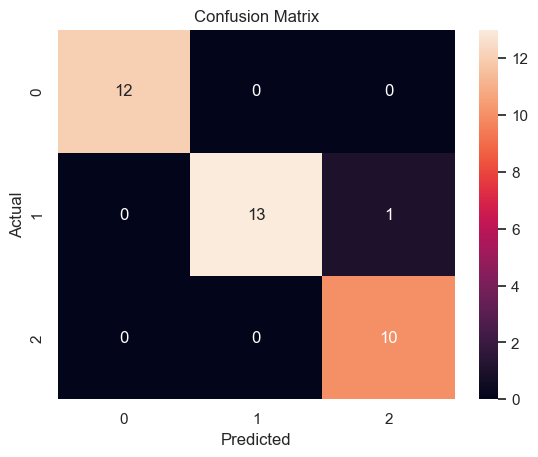

In [122]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled,y_train)
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('Training accuracy score: ',accuracy_score(y_train,y_predict_train))
print('Testing accuracy score: ',accuracy_score(y_test,y_predict_test))
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
print(classification_report(y_test,y_predict_test))
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model,x_train_scaled,y_train,cv=10,verbose=1)
cross_val_scores.mean()
print("Cross validation average score: ",cross_val_scores.mean())

Training accuracy score:  1.0
Testing accuracy score:  0.9166666666666666
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.79      0.88        14
           3       0.83      1.00      0.91        10

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.91        36

Cross validation average score:  0.9166666666666666


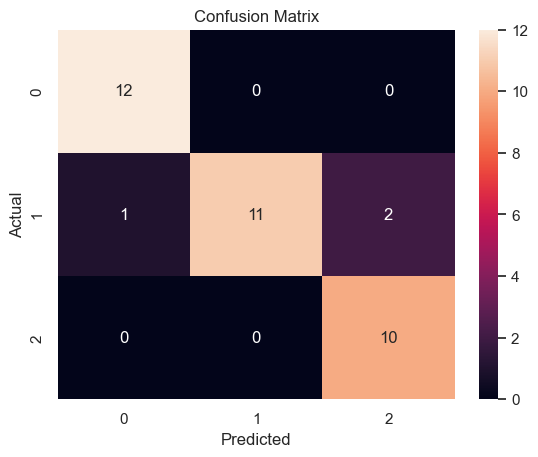

In [121]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('Training accuracy score: ',accuracy_score(y_train,y_predict_train))
print('Testing accuracy score: ',accuracy_score(y_test,y_predict_test))
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
print(classification_report(y_test,y_predict_test))
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model,x_train_scaled,y_train,cv=10,verbose=1)
cross_val_scores.mean()
print("Cross validation average score: ",cross_val_scores.mean())

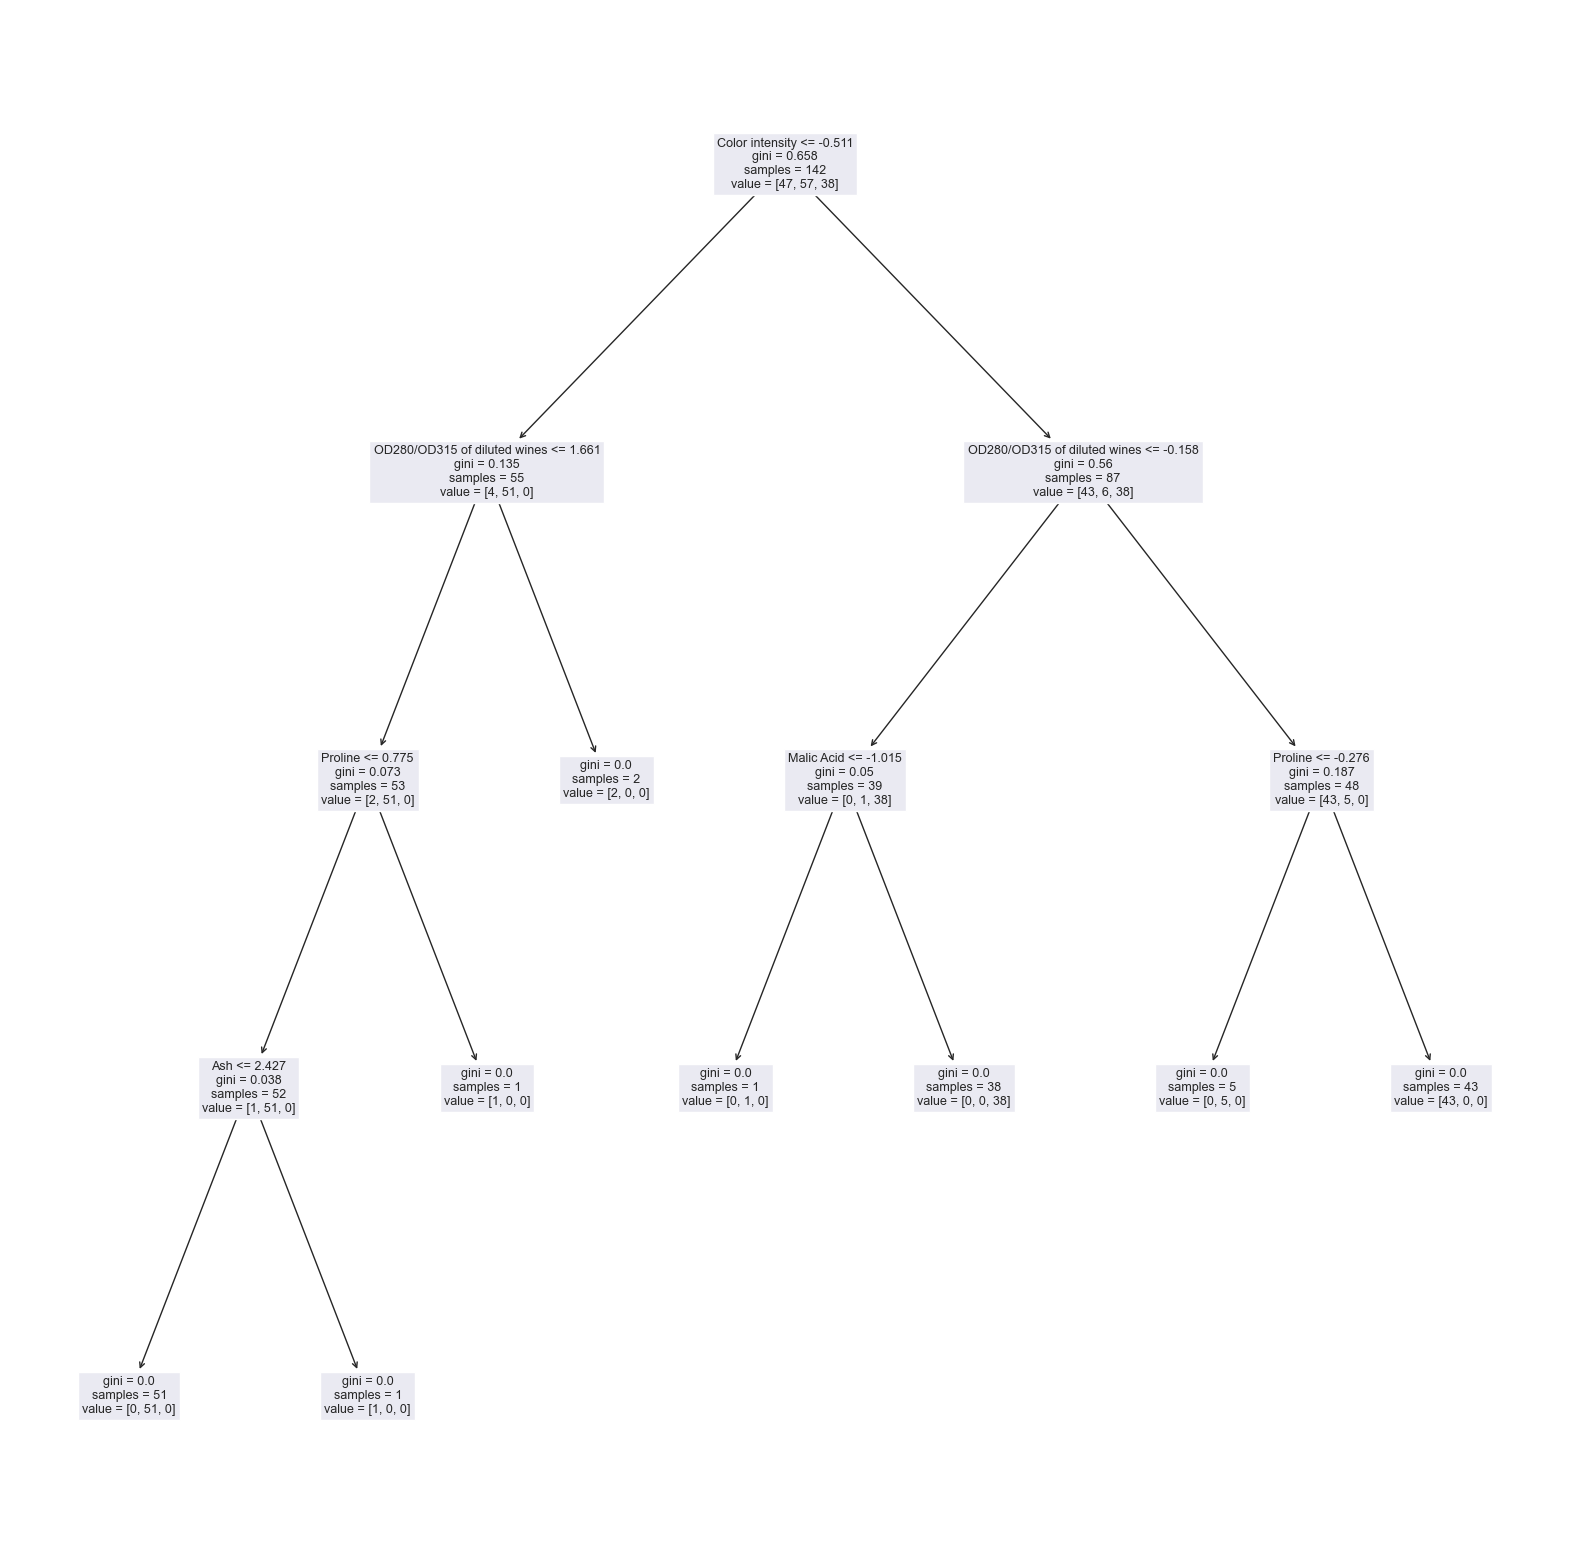

In [100]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree = plot_tree(model,feature_names=x.columns)

In [101]:
pd.DataFrame(model.feature_importances_,index=x.columns).sort_values(by=0)

0
Alcohol                       0.000000
Alcalinity of ash             0.000000
Magnesium                     0.000000
Total phenols                 0.000000
Nonflavanoid phenols          0.000000
Proanthocyanins               0.000000
Hue                           0.000000
Malic Acid                    0.020865
Ash                           0.021003
Proline                       0.116130
Color intensity               0.398745
OD280/OD315 of diluted wines  0.443257

Training accuracy score:  0.9859154929577465
Testing accuracy score:  0.8888888888888888
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.71      0.83        14
           3       0.71      1.00      0.83        10

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.92      0.89      0.89        36

Cross validation average score:  0.9152380952380954


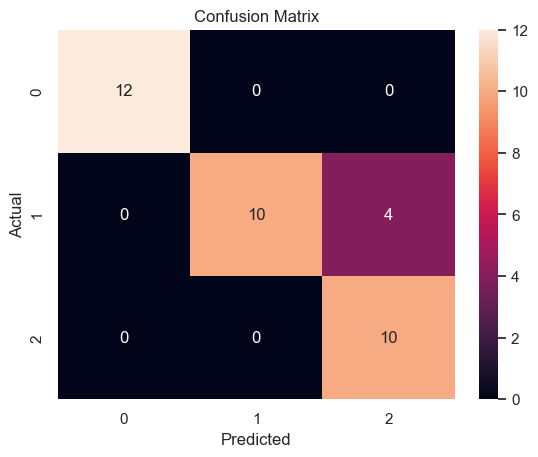

In [123]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_features=5,max_depth=3)
model.fit(x_train_scaled,y_train)
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('Training accuracy score: ',accuracy_score(y_train,y_predict_train))
print('Testing accuracy score: ',accuracy_score(y_test,y_predict_test))
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
print(classification_report(y_test,y_predict_test))
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model,x_train_scaled,y_train,cv=10,verbose=1)
cross_val_scores.mean()
print("Cross validation average score: ",cross_val_scores.mean())

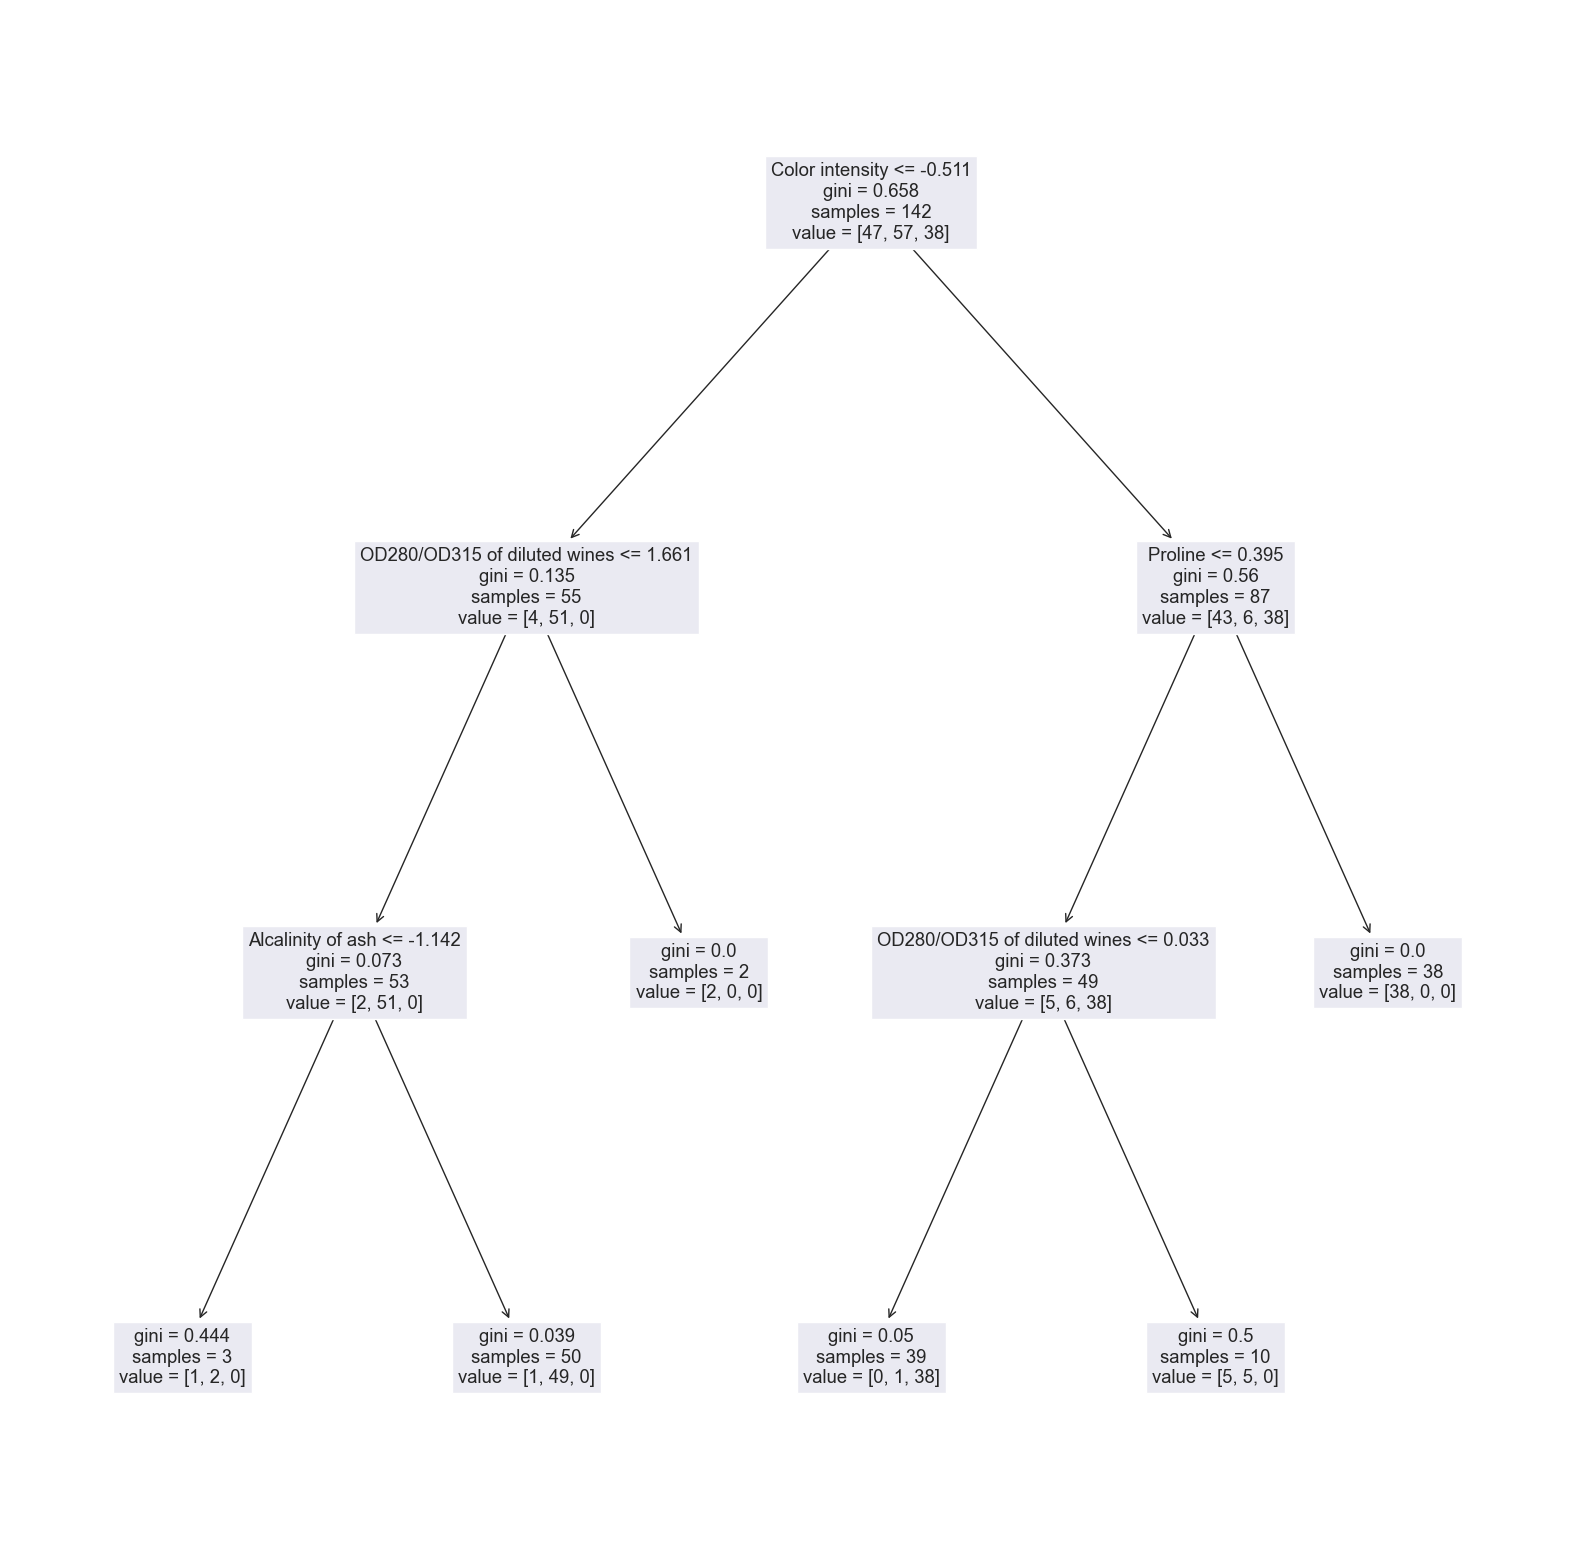

In [103]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree = plot_tree(model,feature_names=x.columns)

Training accuracy score:  0.9859154929577465
Testing accuracy score:  0.9444444444444444
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.86      0.92        14
           3       0.83      1.00      0.91        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

Cross validation average score:  0.9795238095238096


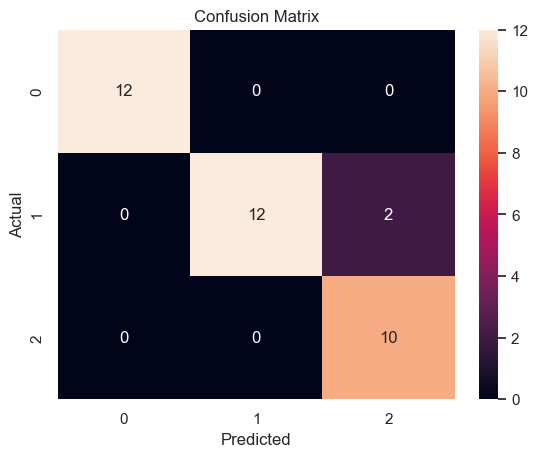

In [139]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_features=4,max_depth=2)
model.fit(x_train_scaled,y_train)
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('Training accuracy score: ',accuracy_score(y_train,y_predict_train))
print('Testing accuracy score: ',accuracy_score(y_test,y_predict_test))
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
print(classification_report(y_test,y_predict_test))
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model,x_train_scaled,y_train,cv=10,verbose=1)
cross_val_scores.mean()
print("Cross validation average score: ",cross_val_scores.mean())

Training accuracy score:  1.0
Testing accuracy score:  0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

Cross validation average score:  0.9647619047619049


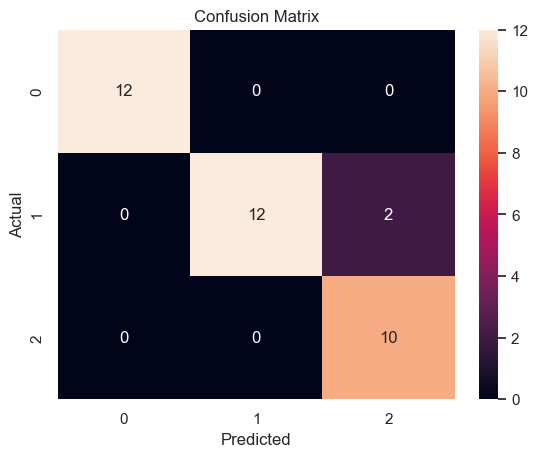

In [128]:
from xgboost import XGBClassifier
model = XGBClassifier(objective='multi:softmax',num_class=3)
y_train_new = y_train-1
y_test_new = y_test-1
model.fit(x_train_scaled,y_train_new)
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('Training accuracy score: ',accuracy_score(y_train_new,y_predict_train))
print('Testing accuracy score: ',accuracy_score(y_test_new,y_predict_test))
sns.heatmap(confusion_matrix(y_test_new,y_predict_test),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
print(classification_report(y_test_new,y_predict_test))
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model,x_train_scaled,y_train_new,cv=10,verbose=1)
cross_val_scores.mean()
print("Cross validation average score: ",cross_val_scores.mean())

Training accuracy score:  0.9788732394366197
Testing accuracy score:  0.9722222222222222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.93      0.96        14
           3       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Cross validation average score:  0.9652380952380952


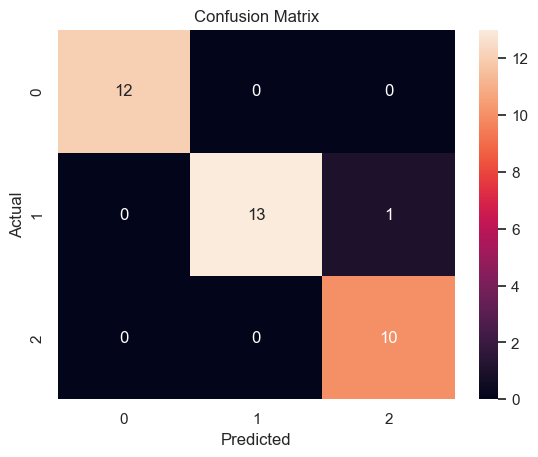

In [135]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=11)
model.fit(x_train_scaled,y_train)
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('Training accuracy score: ',accuracy_score(y_train,y_predict_train))
print('Testing accuracy score: ',accuracy_score(y_test,y_predict_test))
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
print(classification_report(y_test,y_predict_test))
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model,x_train_scaled,y_train_new,cv=10,verbose=1)
cross_val_scores.mean()
print("Cross validation average score: ",cross_val_scores.mean())

Training accuracy score:  1.0
Testing accuracy score:  0.9722222222222222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.93      0.96        14
           3       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Cross validation average score:  0.959047619047619


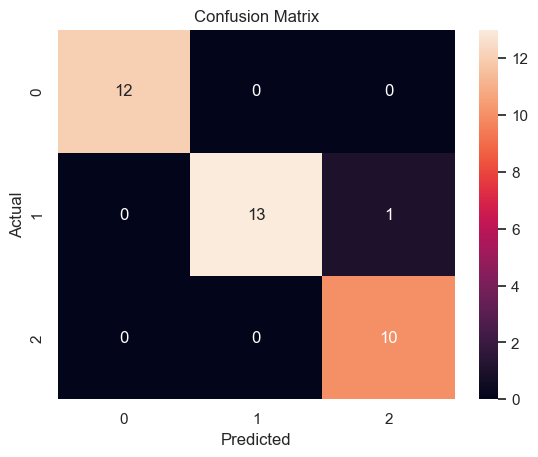

In [127]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train_scaled,y_train)
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('Training accuracy score: ',accuracy_score(y_train,y_predict_train))
print('Testing accuracy score: ',accuracy_score(y_test,y_predict_test))
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
print(classification_report(y_test,y_predict_test))
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model,x_train_scaled,y_train_new,cv=10,verbose=1)
cross_val_scores.mean()
print("Cross validation average score: ",cross_val_scores.mean())

Training accuracy score:  0.9859154929577465
Testing accuracy score:  0.9444444444444444
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.86      0.92        14
           3       0.83      1.00      0.91        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

Cross validation average score:  0.9790476190476192


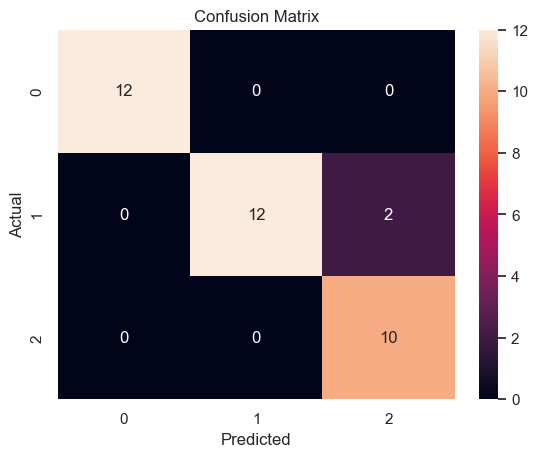

In [140]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_features=4,max_depth=2)
model.fit(x_train_scaled,y_train)
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('Training accuracy score: ',accuracy_score(y_train,y_predict_train))
print('Testing accuracy score: ',accuracy_score(y_test,y_predict_test))
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
print(classification_report(y_test,y_predict_test))
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model,x_train_scaled,y_train,cv=10,verbose=1)
cross_val_scores.mean()
print("Cross validation average score: ",cross_val_scores.mean())

 All the above models are giving training accuracy above 95% and test accuracy above 90%. 
 However, after doing the cross validation on training dataset, Random forest is giving better cross validation score of 97.9%.